In [79]:
import numpy as np
from scipy import optimize
from scipy.stats import linregress

%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use("bmh")


x= np.arange(0,185,5)

v  = np.array([0.285, 0.285, 0.283, 0.28,  0.278, 0.276, 0.273, 0.27,  0.267, 0.263, 0.259, 0.256, 0.252, 0.249, 0.247, 0.247, 0.246, 0.246, 0.246, 0.246, 0.246, 0.247, 0.247,
 0.249, 0.252, 0.256, 0.259, 0.263, 0.267, 0.27,  0.273, 0.276, 0.278, 0.28,  0.283, 0.285, 0.285])

dat = np.zeros((37,6))
dat[:,0] = x
dat[:,1] = np.cos(np.radians(x))
dat[:,2] = np.cos(np.radians(x))**2
dat[:,3] = v

print(v)

[0.285 0.285 0.283 0.28  0.278 0.276 0.273 0.27  0.267 0.263 0.259 0.256
 0.252 0.249 0.247 0.247 0.246 0.246 0.246 0.246 0.246 0.247 0.247 0.249
 0.252 0.256 0.259 0.263 0.267 0.27  0.273 0.276 0.278 0.28  0.283 0.285
 0.285]


LinregressResult(slope=0.0399532643683177, intercept=0.24353751289194495, rvalue=0.9965557577783971, pvalue=1.9155181986435407e-39, stderr=0.0005619584537656977, intercept_stderr=0.00035179312503852124)


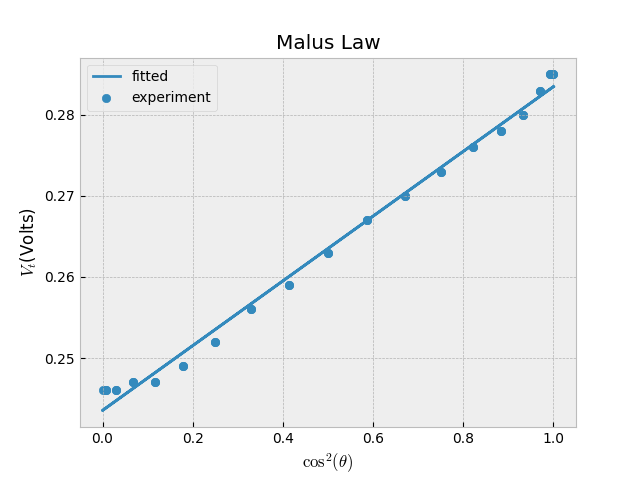

In [80]:
cs2x = np.cos(np.radians(x))**2
res = linregress(cs2x, v)
print(res)
plt.plot(cs2x, res[0]*cs2x + res[1], label = 'fitted')
plt.scatter(cs2x, v, label = 'experiment')
plt.title("Malus Law")
plt.xlabel(r"$ \cos^2({\theta}) $")
plt.ylabel(r"$V_t$(Volts)")
plt.legend()
plt.grid('black')
plt.show()


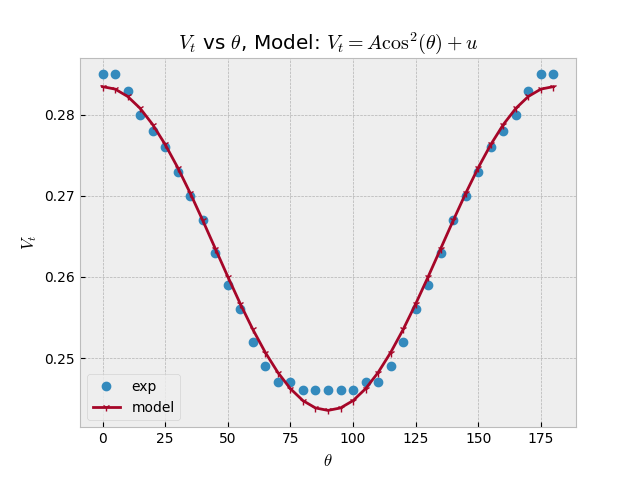

Fit model paramters (A,u) 0.03995326434901165 0.24353751290036005 Volts
Estimated Initial maximum voltage (V_0):  0.2834907772493717 Volts
Minima at 90 degrees:  0.24353751290036005 Volts


In [88]:
def func(x,a,u):
    return (a*np.cos(np.radians(x))**2+u)

popt, pcov = optimize.curve_fit(func, x, v)
out = func(x,*popt)
dat[:,4] = out

fig,ax=plt.subplots()
ax.plot(x,v,"o", label = 'exp')
ax.plot(x, func(x, *popt) ,'-1', label = 'model')
ax.set_title(r"$V_t$ vs $\theta$, Model: $V_t = A \cos^2(\theta) + u$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$V_t$")
plt.legend()
plt.show()

print("Fit model paramters (A,u)", *popt, "Volts")
print(r"Estimated Initial maximum voltage (V_0): ",func(0,*popt), "Volts")
print("Minima at 90 degrees: ", func(90,*popt), "Volts")


In [82]:
dat[:,5] = np.abs(dat[:,3]-dat[:,4])
np.savetxt("malus.csv",dat,fmt="%G",delimiter=",")
